In [1]:
!pip install scikit-learn
!pip install matplotlib

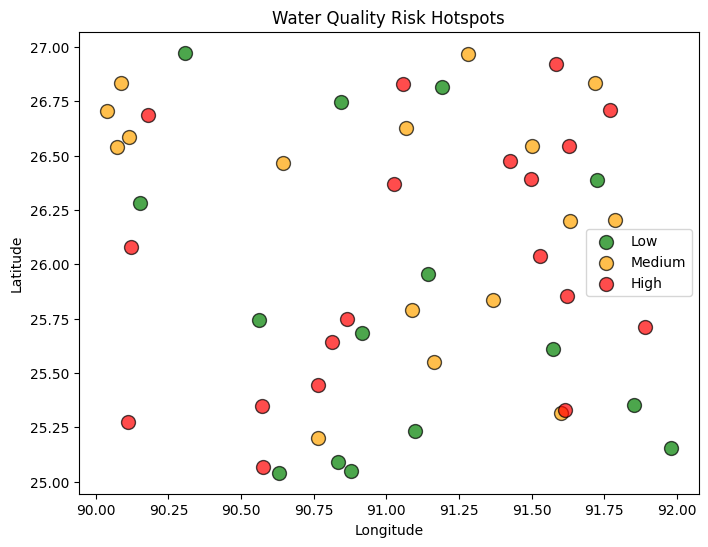

✅ Clustering complete. Results saved to 'sensor_dataset_with_clusters.csv'


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# ===============================
# 1. Load Dataset
# ===============================
df = pd.read_csv("sensor_dataset.csv")

# ===============================
# 2. Select Relevant Features
# ===============================
features = [
    "pH",
    "Turbidity (NTU)",
    "TDS (mg/L)",
    "Conductivity (ÂµS/cm)",
    "Dissolved_Oxygen (mg/L)",
    "ORP (mV)",
    "Chlorine_Free (mg/L)"
]

X = df[features]

# ===============================
# 3. Scale Features
# ===============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ===============================
# 4. Clustering with KMeans
# ===============================
kmeans = KMeans(n_clusters=3, random_state=42)
df["RiskCluster"] = kmeans.fit_predict(X_scaled)

# ===============================
# 5. Map Clusters to Risk Levels
# ===============================
# We’ll assign risk levels based on average turbidity per cluster
cluster_means = df.groupby("RiskCluster")[features].mean()
risk_order = cluster_means["Turbidity (NTU)"].rank().astype(int) - 1
df["RiskLevel"] = df["RiskCluster"].map(risk_order).map({0: "Low", 1: "Medium", 2: "High"})

# ===============================
# 6. Plot Hotspot Visualization
# ===============================
plt.figure(figsize=(8,6))
for risk, color in zip(["Low","Medium","High"], ["green","orange","red"]):
    subset = df[df["RiskLevel"]==risk]
    plt.scatter(subset["Longitude"], subset["Latitude"],
                label=risk, c=color, s=100, alpha=0.7, edgecolors="k")

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Water Quality Risk Hotspots")
plt.legend()
plt.show()

# ===============================
# 7. Save Updated Dataset
# ===============================
df.to_csv("sensor_dataset_with_clusters.csv", index=False)
print("✅ Clustering complete. Results saved to 'sensor_dataset_with_clusters.csv'")
